# Метод Монте-Карло в физике

Методом Монте-Карло называют целую множество различных метоедов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
#%matplotlib notebook
rndm = np.random.RandomState(12345)

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
(10% от общей оценки)

Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)} R^d
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [4]:
def getSphereVolumeExact(d, r = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    return np.pi**(d/2)/sp.gamma(1+d/2)*r**d


1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

2.0
3.141592653589793
4.188790204786391
4.1887902047863905


<function matplotlib.pyplot.show(*args, **kw)>

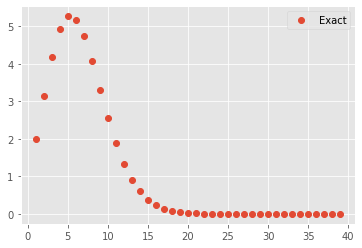

In [56]:
# Write your code and answer here
#for i in range(1,10):
#    r = rndm.uniform(0.1,100)
#    print("via MC: {:.4}, via maths: {:.4}".format(getSphereVolumeExact(i,r), V(i,r)))


#for i in range(1,10):
#    r = rndm.uniform(0.1,100)
#    print("via MC: {:.4}, via maths: {:.4}".format(getSphereVolumeExact(i,r), V(i,r)))
for i in range(1,4):
    print(getSphereVolumeExact(i))
print(4/3*np.pi)


D = np.arange(1, 40, dtype=np.int32)
plt.plot(D, getSphereVolumeExact(D), "o", label="Exact")
plt.legend()
plt.show

### Задание 1.2
(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [31]:
def getSphereVolumePseudorandom(N, d, r = 1.):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    ar = rndm.uniform(low=-1, high=1,size=(d, N))
    a = np.zeros(N)
    for i in range(d):
        a += ar[i,:]**2    
    a = a <= 1.
    V = ((2*r)**d)*(np.count_nonzero(a)/N)   #Фактор с радиусом для того, чтобы учесть объем гиперкуба
    return V

Постройте график зависимости числа узлов $N$ при котором достигается относительная точность порядка $10^{-8}$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$. Для нахождения соответствующего $N$ используйте алгоритм удвоения $N$, который вы использовали для оценки точности интегралов в 6-ой домашней работе.

In [33]:
# Write your code and answer here
def eps(vex,vran):
    return (vex-vran)/vex

D = 9
n = np.empty(D)
num = np.arange(D)+1

for d in range(1,D+1):
    N = 10000
    V = getSphereVolumeExact(d)
    v = getSphereVolumePseudorandom(N,d)
    while abs(eps(V,v))>1e-8:
        N *= 2
        v = getSphereVolumePseudorandom(N, d)
    n[d-1] = N
plt.plot(num, n, "-", label="Число точек от размерности")
plt.yscale("log")
plt.xlabel("d")
plt.ylabel("N dots")
plt.show()

KeyboardInterrupt: 

Простите, но это уж слишком больная точность для того, чтобы это отработало за какое-то конечное время, пока я не состарюсь и умру, поэтому каждый шаг увеличивает в 10 раз, а не в два. И точность поменьше

### Задание 1.3

(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq` выполните команду 
`pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [8]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [9]:
sobol_seq.i4_sobol_generate?

Signature: sobol_seq.i4_sobol_generate(dim_num, n, skip=0)
Docstring:
i4_sobol_generate generates a Sobol dataset.

Parameters:
  Input, integer dim_num, the spatial dimension.
  Input, integer N, the number of points to generate.
  Input, integer SKIP, the number of initial points to skip.

  Output, real R(M,N), the points.
File:      ~/.local/lib/python3.7/site-packages/sobol_seq/sobol_seq.py
Type:      function


In [45]:
def getSphereVolumeQuasirandom(N, d, r = 1.):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    ar = sobol_seq.i4_sobol_generate(d,N)
    a = np.zeros(N)
    for i in range(d):
        a += ar[:,i]**2    
    a = a <= 1.
    V = ((2*r)**d)*(np.count_nonzero(a)/N)   #Фактор с радиусом для того, чтобы учесть объем гиперкуба
    return V

Сравните точность вчисления объема для квазислучайной погрешности, построив такой же график $N(D)$ при которых достигается точность $10^{-8}$, как для псевдослучайных чисел.

0.021237366015016985
0.04638662987915739
0.26853519905503553
0.027422727632436063
0.2431096603266332
0.05388707540829156
0.22389174154586414
0.06867008985503698
0.017446944797064077
0.19691440708319985
0.07645156814567987
-0.02794955893350425


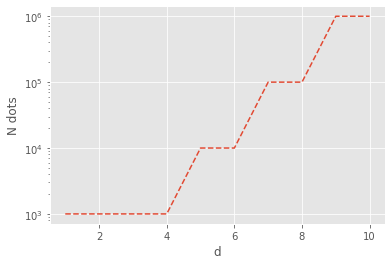

In [48]:
# Write your code and answer here
D = 9
n = np.empty(D)
num = np.arange(D)+1

for d in range(1,D+1):
    N = 10000
    V = getSphereVolumeExact(d)
    v = getSphereVolumeQuasirandom(N,d)
    while abs(eps(V,v))>1e-8:
        N *= 2
        v = getSphereVolumeQuasirandom(N, d)
    n[d-1] = N
plt.plot(num, n, "-", label="Число точек от размерности")
plt.yscale("log")
plt.xlabel("d")
plt.ylabel("N dots")
plt.show()


905.472
904.7786842338603


Сделайте выводы об эффективности квазислучайных последовательностей. 

# Write your code and answer here
При квазислучайном выборе точек требуется на несколько порядков меньше точек, что сильно усоряет вычисления по отношению к простому методу Монте-Карло

## Задание 2

(50% от общей оценки)

Рассмотрим решетку $n\times n$ в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние когда все спины одинаково ориентированы. Однако при ненлевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблемотичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):

1. Задаем случайное начальное состояние

2. Выбираем случайную ячейку

3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.

4. Если изменение энергии отрицательное, оставляем спин перевернутым

5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью с вероятностью $\exp(-\delta E/kT)$

6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [105]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = 2*rndm.random_integers(low=-1,high=0,size=(N,N))+1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [240]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    dE=0
    N = state.shape[0]-1
    state1 = state[max(i-1,0):min(i+1,N)+1,max(j-1,0):min(j+1,N)+1] # Учитывая диагональные
    if i!=0 and j!=0 and i!=N and j!=N:
        dE = -(np.sum(state1)-state[i,j])*state[i,j]
    elif i==0 and j!=N and j!=0:
        dE = -(np.sum(state1)-state[i,j]+np.sum(state[N,j-1:j+1]))*state[i,j]
    elif i==N and j!=N and j!=0:
        dE = -(np.sum(state1)-state[i,j]+np.sum(state[0,j-1:j+1]))*state[i,j]
    elif j==0 and i!=0 and i!=N:
        dE = -(np.sum(state1)-state[i,j]+np.sum(state[i-1:i+1,N]))*state[i,j]
    elif j==N and i!=0 and i!=N:
        dE = -(np.sum(state1)-state[i,j]+np.sum(state[i-1:i+1,0]))*state[i,j]
    elif i==0 and j==0: 
        dE = -(np.sum(state1)-state[i,j]+np.sum(state[N,0:2]+state[0:2,N])+state[N,N])*state[i,j]
    elif i==N and j==0:
        dE = -(np.sum(state1)-state[i,j]+np.sum(state[0,0:2]+state[N-2:N,N])+state[0,N])*state[i,j]
    elif j==N and i==0:
        dE = -(np.sum(state1)-state[i,j]+np.sum(state[N,N-2:N]+state[0:2,0])+state[N,0])*state[i,j]
    elif i==N and j==N:
        dE = -(np.sum(state1)-state[i,j]+np.sum(state[0,N-2:N]+state[N-2:N,0])+state[0,0])*state[i,j]
    return -2*dE

In [241]:
np.eye(2).shape

(2, 2)

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. Можете использовать как псевдослучайную, так и квазислучайную последовательность, на ваш выбор. 

Обратите внимание, что если вам нужно сгенерировать большое количество случайных чисел и далее использовать их в цикле, то быстрее будет за один раз сгенерировать нужное количество случайных чисел и потом использовать их, чем генерировать их по одному в цикле. 

In [242]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = state.shape[0]-1
    i_ar, j_ar = rndm.random_integers(low=0,high=N,size=(2,N**2))
    unit_ar = rndm.random_integers(low=0,high=1,size=(N**2))
    de_array = np.empty(N**2)
    for a in range(N**2):
        de_array[a] = getDeltaE(i_ar[a],j_ar[a],state)
    prob_array = np.zeros_like(unit_ar)
    prob_array[np.exp(-de_array/T)<=unit_ar] = 1 #np.ones_like(prob_array[prob_array<=unit_ar], dtype=np.int32)
    #   prob_array[prob_array>unit_ar] = 0 #np.zeros_like(prob_array[prob_array>unit_ar], dtype=np.int32)
    #   prob_array[de_array<0] = 0
    prob_array = np.int32(prob_array)
    for a in range(N**2):
        if prob_array[a]==1:
            state[i_ar[a],j_ar[a]] = -state[i_ar[a],j_ar[a]]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [244]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E = 0.
    N = state.shape[0]-1
    for i in range(N):
        for j in range(N):
                 state1 = state[max(i-1,0):min(i+1,N)+1,max(j-1,0):min(j+1,N)+1] # Учитывая диагональные
                 if i!=0 and j!=0 and i!=N and j!=N:
                     E += -(np.sum(state1)-state[i,j])*state[i,j]
                 elif i==0 and j!=N and j!=0:
                     E += -(np.sum(state1)-state[i,j]+np.sum(state[N,j-1:j+1]))*state[i,j]
                 elif i==N and j!=N and j!=0:
                     E += -(np.sum(state1)-state[i,j]+np.sum(state[0,j-1:j+1]))*state[i,j]
                 elif j==0 and i!=0 and i!=N:
                     E += -(np.sum(state1)-state[i,j]+np.sum(state[i-1:i+1,N]))*state[i,j]
                 elif j==N and i!=0 and i!=N:
                     E += -(np.sum(state1)-state[i,j]+np.sum(state[i-1:i+1,0]))*state[i,j]
                 elif i==0 and j==0: 
                     E += -(np.sum(state1)-state[i,j]+np.sum(state[N,0:2]+state[0:2,N])+state[N,N])*state[i,j]
                 elif i==N and j==0:
                     E += -(np.sum(state1)-state[i,j]+np.sum(state[0,0:2]+state[N-2:N,N])+state[0,N])*state[i,j]
                 elif j==N and i==0:
                     E += -(np.sum(state1)-state[i,j]+np.sum(state[N,N-2:N]+state[0:2,0])+state[N,0])*state[i,j]
                 elif i==N and j==N:
                     E += -(np.sum(state1)-state[i,j]+np.sum(state[0,N-2:N]+state[N-2:N,0])+state[0,0])*state[i,j]
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [245]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

Далее задаются начальные параметры: 
**Nt** - количество точек по температуре, 
**N** - линейный размер решетки, 
**eqStep** - количество попыток переворота спина в течение которых система приводится к равновесному сосотоянию, обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,
**steps** - количество попыток переворота спина в течение на которых рассчитывается значения энергии и намагниченности, нужно для усреднения случайных значений

Подберите наибольшие значения этих параметров таким образом, что бы ваша программа выполнялась выполнялась за разумно короткое время 

In [248]:
N       = 20         # размер решетки NxN
Nt      = 20         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5., Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

Далее представлен основной блок программы, соединяющий всё написанное выше в одно целое. Здесь, в цикле по точкам температуры, задается случайное начальное состояние, приводится к равновесному, и далее вычисляется средние значения энергии и намагниченности, и строится их график.

Complete 0.0 %Complete 5.0 %Complete 10.0 %Complete 15.0 %Complete 20.0 %Complete 25.0 %Complete 30.0 %Complete 35.0 %Complete 40.0 %Complete 45.0 %Complete 50.0 %Complete 55.00000000000001 %Complete 60.0 %Complete 65.0 %Complete 70.0 %Complete 75.0 %Complete 80.0 %Complete 85.0 %Complete 90.0 %Complete 95.0 %Done

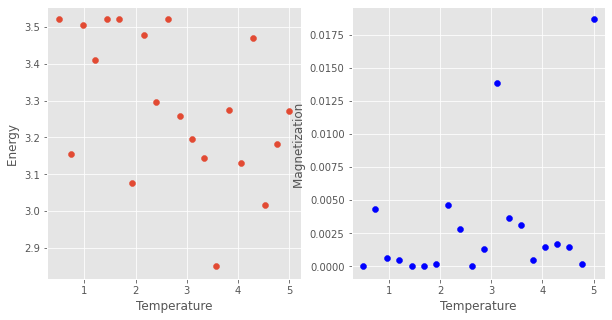

In [249]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описыввают ли они поведение феромагнетиков и фазовые переходы?

In [131]:
# Write your answer here


array([2.71828183])

Дополнительно. Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое. 

In [21]:
N = 64
state = getInitialState(N)

NameError: name 'state' is not defined

In [22]:
plt.figure()
# Write your code here
makeFlip(0.5, state);

NameError: name 'state' is not defined

In [23]:
# Write your answer here

In [ ]:
np.arrat([[1,2,3],[4,5,6]).reshape()